In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/bigdata

/content/drive/MyDrive/Colab Notebooks/bigdata


In [4]:
df = pd.read_csv('data.csv')
df.shape

(200092, 331)

In [ ]:
df.head()

,SERIAL_NUM,CUST_LOCATION,AGE,GENDER,JOB,BRANCH_DIST,AMT_EXCHANGE_A_M1,AMT_EXCHANGE_A_M2,AMT_EXCHANGE_A_M3,AMT_EXCHANGE_A_M4,AMT_EXCHANGE_A_M5,AMT_EXCHANGE_A_M6,AMT_EXCHANGE_A_M7,AMT_EXCHANGE_A_M8,AMT_EXCHANGE_A_M9,AMT_EXCHANGE_A_M10,AMT_EXCHANGE_A_M11,AMT_EXCHANGE_A_M12,AMT_EXCHANGE_A_M13,AMT_EXCHANGE_B_M1,AMT_EXCHANGE_B_M2,AMT_EXCHANGE_B_M3,AMT_EXCHANGE_B_M4,AMT_EXCHANGE_B_M5,AMT_EXCHANGE_B_M6,AMT_EXCHANGE_B_M7,AMT_EXCHANGE_B_M8,AMT_EXCHANGE_B_M9,AMT_EXCHANGE_B_M10,AMT_EXCHANGE_B_M11,AMT_EXCHANGE_B_M12,AMT_EXCHANGE_B_M13,AMT_EXCHANGE_C_M1,AMT_EXCHANGE_C_M2,AMT_EXCHANGE_C_M3,AMT_EXCHANGE_C_M4,AMT_EXCHANGE_C_M5,AMT_EXCHANGE_C_M6,AMT_EXCHANGE_C_M7,AMT_EXCHANGE_C_M8,...,AUM_K_M13,AUM_L_M1,AUM_L_M2,AUM_L_M3,AUM_L_M4,AUM_L_M5,AUM_L_M6,AUM_L_M7,AUM_L_M8,AUM_L_M9,AUM_L_M10,AUM_L_M11,AUM_L_M12,AUM_L_M13,AUM_M_M1,AUM_M_M2,AUM_M_M3,AUM_M_M4,AUM_M_M5,AUM_M_M6,AUM_M_M7,AUM_M_M8,AUM_M_M9,AUM_M_M10,AUM_M_M11,AUM_M_M12,AUM_M_M13,AUM_M1,AUM_M2,AUM_M3,AUM_M4,AUM_M5,AUM_M6,AUM_M7,AUM_M8,AUM_M9,AUM_M10,AUM_M11,AUM_M12,AUM_M13
0,161236,6,55~59,1,10.0,5公里以上,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12836,12840,12846,12846,12846,12846,12846,12851,12857,12857,12857,12857,12857
1,163040,6,40~44,1,NaN,5公里以上,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,364139,364246,364429,364429,364429,364429,364429,364543,364722,364722,364722,364722,364722
2,68474,6,55~59,1,NaN,0.5-1公里,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,356535,418321,458573,459519,458700,457525,456755,456412,794587,1112762,1112754,1112491,1111970
3,159801,7,25~29,2,NaN,5公里以上,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40643,40655,40676,40676,40676,40676,40676,40688,40708,40708,40708,40708,40708
4,117899,5,40~44,2,NaN,5公里以上,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,452667,452672,452711,456278,463297,463297,463297,463302,463309,463309,463309,463309,463309


## 前處理:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200092 entries, 0 to 200091
Columns: 331 entries, SERIAL_NUM to AUM_M13
dtypes: float64(14), int64(289), object(28)
memory usage: 505.3+ MB


## 照日期排序

In [5]:
col_train = ['AMT_EXCHANGE_A_M' + str(i) for i in np.arange(1, 13)] + ['AMT_EXCHANGE_B_M' + str(i) for i in np.arange(1, 13)] + \
            ['AMT_EXCHANGE_C_M' + str(i) for i in np.arange(1, 13)] + ['AMT_INVST_M' + str(i) for i in np.arange(1, 13)] + \
            ['AMT_LOAN_D_M' + str(i) for i in np.arange(1, 13)] +  ['AMT_LOAN_E_M' + str(i) for i in np.arange(1, 13)] + \
            ['AMT_LOAN_F_M' + str(i) for i in np.arange(1, 13)] + ['AMT_INTERACT_G_M' + str(i) for i in np.arange(1, 13)] + \
            ['AMT_INTERACT_H_M' + str(i) for i in np.arange(1, 13)] + ['AUM_I_M' + str(i) for i in np.arange(1, 13)] +\
            ['AUM_J_M' + str(i) for i in np.arange(1, 13)] + ['AUM_K_M' + str(i) for i in np.arange(1, 13)] + \
            ['AUM_L_M' + str(i) for i in np.arange(1, 13)] +  ['AUM_M_M' + str(i) for i in np.arange(1, 13)] + \
            ['AUM_M' + str(i) for i in np.arange(1, 13)]
m1 = [True if i.endswith('_M1') else False for i in col_train]
m2 = [True if i.endswith('_M2') else False for i in col_train]
m3 = [True if i.endswith('_M3') else False for i in col_train]
m4 = [True if i.endswith('_M4') else False for i in col_train]
m5 = [True if i.endswith('_M5') else False for i in col_train]
m6 = [True if i.endswith('_M6') else False for i in col_train]
m7 = [True if i.endswith('_M7') else False for i in col_train]
m8 = [True if i.endswith('_M8') else False for i in col_train]
m9 = [True if i.endswith('_M9') else False for i in col_train]
m10 = [True if i.endswith('_M10') else False for i in col_train]
m11 = [True if i.endswith('_M11') else False for i in col_train]
m12 = [True if i.endswith('_M12') else False for i in col_train]

len(col_train) # 180 = 12*15

180

In [6]:
col_train_sorted = []
for m in [m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12]:
    col_train_sorted.extend(list(d for d, s in zip(col_train, m) if s))
    
len(col_train_sorted), col_train_sorted[-15:]

(180,
 ['AMT_EXCHANGE_A_M12',
  'AMT_EXCHANGE_B_M12',
  'AMT_EXCHANGE_C_M12',
  'AMT_INVST_M12',
  'AMT_LOAN_D_M12',
  'AMT_LOAN_E_M12',
  'AMT_LOAN_F_M12',
  'AMT_INTERACT_G_M12',
  'AMT_INTERACT_H_M12',
  'AUM_I_M12',
  'AUM_J_M12',
  'AUM_K_M12',
  'AUM_L_M12',
  'AUM_M_M12',
  'AUM_M12'])

In [7]:
df_sort = df[col_train_sorted + ['AUM_M13']]
df_sort.columns

Index(['AMT_EXCHANGE_A_M1', 'AMT_EXCHANGE_B_M1', 'AMT_EXCHANGE_C_M1',
       'AMT_INVST_M1', 'AMT_LOAN_D_M1', 'AMT_LOAN_E_M1', 'AMT_LOAN_F_M1',
       'AMT_INTERACT_G_M1', 'AMT_INTERACT_H_M1', 'AUM_I_M1',
       ...
       'AMT_LOAN_F_M12', 'AMT_INTERACT_G_M12', 'AMT_INTERACT_H_M12',
       'AUM_I_M12', 'AUM_J_M12', 'AUM_K_M12', 'AUM_L_M12', 'AUM_M_M12',
       'AUM_M12', 'AUM_M13'],
      dtype='object', length=181)

In [ ]:
df_sort.shape

(200092, 181)

## 正規化

In [8]:
from sklearn import preprocessing

df_sort_nor = pd.DataFrame()
min_max_scaler = preprocessing.MinMaxScaler()
cols = list(df_sort.columns)
for col in cols:
  df_sort_nor[col] = min_max_scaler.fit_transform(df_sort[col].values.reshape(-1, 1)).flatten()

df_sort_nor.head()

,AMT_EXCHANGE_A_M1,AMT_EXCHANGE_B_M1,AMT_EXCHANGE_C_M1,AMT_INVST_M1,AMT_LOAN_D_M1,AMT_LOAN_E_M1,AMT_LOAN_F_M1,AMT_INTERACT_G_M1,AMT_INTERACT_H_M1,AUM_I_M1,AUM_J_M1,AUM_K_M1,AUM_L_M1,AUM_M_M1,AUM_M1,AMT_EXCHANGE_A_M2,AMT_EXCHANGE_B_M2,AMT_EXCHANGE_C_M2,AMT_INVST_M2,AMT_LOAN_D_M2,AMT_LOAN_E_M2,AMT_LOAN_F_M2,AMT_INTERACT_G_M2,AMT_INTERACT_H_M2,AUM_I_M2,AUM_J_M2,AUM_K_M2,AUM_L_M2,AUM_M_M2,AUM_M2,AMT_EXCHANGE_A_M3,AMT_EXCHANGE_B_M3,AMT_EXCHANGE_C_M3,AMT_INVST_M3,AMT_LOAN_D_M3,AMT_LOAN_E_M3,AMT_LOAN_F_M3,AMT_INTERACT_G_M3,AMT_INTERACT_H_M3,AUM_I_M3,...,AMT_LOAN_F_M10,AMT_INTERACT_G_M10,AMT_INTERACT_H_M10,AUM_I_M10,AUM_J_M10,AUM_K_M10,AUM_L_M10,AUM_M_M10,AUM_M10,AMT_EXCHANGE_A_M11,AMT_EXCHANGE_B_M11,AMT_EXCHANGE_C_M11,AMT_INVST_M11,AMT_LOAN_D_M11,AMT_LOAN_E_M11,AMT_LOAN_F_M11,AMT_INTERACT_G_M11,AMT_INTERACT_H_M11,AUM_I_M11,AUM_J_M11,AUM_K_M11,AUM_L_M11,AUM_M_M11,AUM_M11,AMT_EXCHANGE_A_M12,AMT_EXCHANGE_B_M12,AMT_EXCHANGE_C_M12,AMT_INVST_M12,AMT_LOAN_D_M12,AMT_LOAN_E_M12,AMT_LOAN_F_M12,AMT_INTERACT_G_M12,AMT_INTERACT_H_M12,AUM_I_M12,AUM_J_M12,AUM_K_M12,AUM_L_M12,AUM_M_M12,AUM_M12,AUM_M13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006129,0.0,0.0,0.0,0.0,0.006129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001247,0.0,0.0,0.0,0.0,0.001247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001287,...,0.0,0.0,0.0,0.001249,0.0,0.0,0.0,0.0,0.001249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001242,0.0,0.0,0.0,0.0,0.001234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001239,0.0,0.0,0.0,0.0,0.001239,0.001240
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.173870,0.0,0.0,0.0,0.0,0.173870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035363,0.0,0.0,0.0,0.0,0.035363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036499,...,0.0,0.0,0.0,0.035429,0.0,0.0,0.0,0.0,0.035429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035239,0.0,0.0,0.0,0.0,0.034994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035145,0.0,0.0,0.0,0.0,0.035145,0.035183
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.170239,0.0,0.0,0.0,0.0,0.170239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040613,0.0,0.0,0.0,0.0,0.040613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045928,...,0.0,0.0,0.0,0.108094,0.0,0.0,0.0,0.0,0.108094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107513,0.0,0.0,0.0,0.0,0.106765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107200,0.0,0.0,0.0,0.0,0.107200,0.107266
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019406,0.0,0.0,0.0,0.0,0.019406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003947,0.0,0.0,0.0,0.0,0.003947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004074,...,0.0,0.0,0.0,0.003954,0.0,0.0,0.0,0.0,0.003954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003933,0.0,0.0,0.0,0.0,0.003906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003923,0.0,0.0,0.0,0.0,0.003923,0.003927
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.216141,0.0,0.0,0.0,0.0,0.216141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043948,0.0,0.0,0.0,0.0,0.043948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045341,...,0.0,0.0,0.0,0.045006,0.0,0.0,0.0,0.0,0.045006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044765,0.0,0.0,0.0,0.0,0.044453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044644,0.0,0.0,0.0,0.0,0.044644,0.044693


## train/test split

In [9]:
from sklearn.model_selection import train_test_split

X = df_sort_nor.drop('AUM_M13', axis = 1)
Y = df_sort_nor['AUM_M13']

train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size = 0.3, random_state = 1, shuffle = True)
train_index = train_x.index
print(f'train shape = {train_x.shape}\ntest shape = {val_x.shape}')

train shape = (140064, 180)
test shape = (60028, 180)


In [ ]:
train_index

Int64Index([178723, 127140,  45254,  67118,  25639, 130973,  13271, 142470,
            190350, 143627,
            ...
            138823, 180172, 151681,  21440, 117583,  73349, 109259,  50057,
              5192, 128037],
           dtype='int64', length=140064)

## Save train/test data

In [ ]:
train_x.to_csv('train.csv', index = False)
val_x.to_csv('test.csv', index = False)

## reshape for LSTM

In [10]:
train_x_lstm = np.array(train_x).reshape(train_x.shape[0], 12, 15)
val_x_lstm = np.array(val_x).reshape(val_x.shape[0], 12, 15)

train_y_lstm = np.array(train_y)
val_y_lstm = np.array(val_y)

train_x_lstm.shape, train_y_lstm.shape

((140064, 12, 15), (140064,))

## model_lstm

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Embedding, SimpleRNN, BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import plot_model
import time

In [12]:
model = Sequential()
model.add(LSTM(32, input_shape = (12, 15), return_sequences = False))
model.add(Dense(1))

model.compile(loss = 'mean_absolute_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                6144      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 6,177
Trainable params: 6,177
Non-trainable params: 0
_________________________________________________________________


In [13]:
start = time.time()
model_history = model.fit(train_x_lstm, train_y_lstm, batch_size = 32, epochs = 10)
end = time.time()
print("耗時: {} 秒".format(end-start))

Epoch 1/10
4377/4377 [==============================] - 19s 3ms/step - loss: 0.0071
Epoch 2/10
4377/4377 [==============================] - 12s 3ms/step - loss: 0.0051
Epoch 3/10
4377/4377 [==============================] - 12s 3ms/step - loss: 0.0052
Epoch 4/10
4377/4377 [==============================] - 12s 3ms/step - loss: 0.0051
Epoch 5/10
4377/4377 [==============================] - 12s 3ms/step - loss: 0.0050
Epoch 6/10
4377/4377 [==============================] - 12s 3ms/step - loss: 0.0050
Epoch 7/10
4377/4377 [==============================] - 12s 3ms/step - loss: 0.0050
Epoch 8/10
4377/4377 [==============================] - 12s 3ms/step - loss: 0.0050
Epoch 9/10
4377/4377 [==============================] - 12s 3ms/step - loss: 0.0049
Epoch 10/10
4377/4377 [==============================] - 12s 3ms/step - loss: 0.0049
耗時: 125.9132788181305 秒


In [14]:
def inverse_transform(y):
  min_max_scaler = preprocessing.MinMaxScaler()
  min_max_scaler.fit_transform(df_sort['AUM_M13'].values.reshape(-1, 1))
  inverse_y = min_max_scaler.inverse_transform(y.reshape(-1, 1)).flatten()
  return inverse_y

In [15]:
pred_val_y_lstm = model.predict(val_x_lstm)

pred_inverse_val_y_lstm = inverse_transform(pred_val_y_lstm)
real_inverse_val_y = inverse_transform(val_y.values)

pred_inverse_val_y_lstm.shape, real_inverse_val_y.shape

((60028,), (60028,))

In [16]:
print(f'MSE = {np.mean((pred_inverse_val_y_lstm - real_inverse_val_y)**2)}')

MSE = 44157540933.137596


In [17]:
def build_result(pred_inverse_val_y, real_inverse_val_y):
  real_inverse_val_m12 = inverse_transform(val_x['AUM_M12'].values)
  val_result = pd.DataFrame({'real_m12': np.round(real_inverse_val_m12, 2),'real_m13': real_inverse_val_y, 'pred_m13': np.round(pred_inverse_val_y, 2)})
  val_result['real_m13'] += 0.01
  val_result['residual(%)'] = ((val_result['pred_m13'] - val_result['real_m13'])/val_result['real_m13'])*100
  val_result['abs(residual(%))'] = abs(val_result['residual(%)'])
  total_asset = sum(val_result['real_m13'])
  val_result['adj.residual(%)'] = (val_result['residual(%)']*val_result['real_m13']/total_asset)*100
  val_result['abs(adj.residual(%))'] = abs(val_result['adj.residual(%)'])
  return val_result.round(2)

In [18]:
def print_score(num, val_result):
  mse = np.mean((val_result['pred_m13'] - val_result['real_m13'])**2)
  rmse = np.sqrt(mse)
  mae = np.mean(abs(val_result['pred_m13'] - val_result['real_m13']))
  mean_adj_res = np.mean(val_result['abs(adj.residual(%))'])
  # print(f'mse = {np.round(mse, 2)}\nrmse = {np.round(rmse, 2)}\nmae = {np.round(mae, 2)}\nmean_adj_res = {np.round(mean_adj_res, 2)}')
  return pd.DataFrame({'mse': np.round(mse, 2), 'rmse': np.round(rmse, 2), 'mae': np.round(mae, 2), 'mean_adj_res': np.round(mean_adj_res, 2)}, index = [f'model{num}'])

In [21]:
val_result_lstm = build_result(pred_inverse_val_y_lstm, real_inverse_val_y)
print_score(1, val_result_lstm)

,mse,rmse,mae,mean_adj_res
model1,4.415754e+10,210136.96,51893.56,0.02


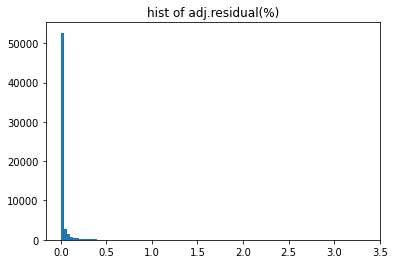

In [20]:
plt.hist(val_result_lstm['abs(adj.residual(%))'], bins = 100)
plt.title('hist of adj.residual(%)')
plt.show()

In [ ]:
# 加權後預測錯誤前幾名
val_result_lstm.sort_values('abs(adj.residual(%))', ascending=False)[:20]

,real_m12,real_m13,pred_m13,residual(%),abs(residual(%)),adj.residual(%),abs(adj.residual(%))
59105,108125.76,7392850.01,1.130781e+05,-98.47,98.47,-3.34,3.34
26395,853413.68,7833641.01,8.696938e+05,-88.90,88.90,-3.20,3.20
30189,867676.21,7452108.01,8.700144e+05,-88.33,88.33,-3.02,3.02
22340,419839.78,6905775.01,4.219831e+05,-93.89,93.89,-2.98,2.98
54513,3896380.31,10143537.01,3.827006e+06,-62.27,62.27,-2.90,2.90
13760,9591627.17,2452399.01,8.533820e+06,247.98,247.98,2.79,2.79
39304,10096667.57,3636166.01,9.553652e+06,162.74,162.74,2.72,2.72
44176,19493.86,5760478.01,1.990250e+04,-99.65,99.65,-2.64,2.64
10756,170290.36,5241997.01,-5.030771e+04,-100.96,100.96,-2.43,2.43
7776,1592894.89,6643524.01,1.602470e+06,-75.88,75.88,-2.32,2.32


In [ ]:
# 看看誤差前幾名的人前幾個月有啥異常狀況 看不出所以然==
val_x_reset_index = val_x.reset_index(drop = True)
# val_x_reset_index.iloc[val_result_lstm.sort_values('abs(adj.residual(%))', ascending=False)[:20].index, :]

,AMT_EXCHANGE_A_M1,AMT_EXCHANGE_B_M1,AMT_EXCHANGE_C_M1,AMT_INVST_M1,AMT_LOAN_D_M1,AMT_LOAN_E_M1,AMT_LOAN_F_M1,AMT_INTERACT_G_M1,AMT_INTERACT_H_M1,AUM_I_M1,AUM_J_M1,AUM_K_M1,AUM_L_M1,AUM_M_M1,AUM_M1,AMT_EXCHANGE_A_M2,AMT_EXCHANGE_B_M2,AMT_EXCHANGE_C_M2,AMT_INVST_M2,AMT_LOAN_D_M2,AMT_LOAN_E_M2,AMT_LOAN_F_M2,AMT_INTERACT_G_M2,AMT_INTERACT_H_M2,AUM_I_M2,AUM_J_M2,AUM_K_M2,AUM_L_M2,AUM_M_M2,AUM_M2,AMT_EXCHANGE_A_M3,AMT_EXCHANGE_B_M3,AMT_EXCHANGE_C_M3,AMT_INVST_M3,AMT_LOAN_D_M3,AMT_LOAN_E_M3,AMT_LOAN_F_M3,AMT_INTERACT_G_M3,AMT_INTERACT_H_M3,AUM_I_M3,...,AMT_LOAN_E_M10,AMT_LOAN_F_M10,AMT_INTERACT_G_M10,AMT_INTERACT_H_M10,AUM_I_M10,AUM_J_M10,AUM_K_M10,AUM_L_M10,AUM_M_M10,AUM_M10,AMT_EXCHANGE_A_M11,AMT_EXCHANGE_B_M11,AMT_EXCHANGE_C_M11,AMT_INVST_M11,AMT_LOAN_D_M11,AMT_LOAN_E_M11,AMT_LOAN_F_M11,AMT_INTERACT_G_M11,AMT_INTERACT_H_M11,AUM_I_M11,AUM_J_M11,AUM_K_M11,AUM_L_M11,AUM_M_M11,AUM_M11,AMT_EXCHANGE_A_M12,AMT_EXCHANGE_B_M12,AMT_EXCHANGE_C_M12,AMT_INVST_M12,AMT_LOAN_D_M12,AMT_LOAN_E_M12,AMT_LOAN_F_M12,AMT_INTERACT_G_M12,AMT_INTERACT_H_M12,AUM_I_M12,AUM_J_M12,AUM_K_M12,AUM_L_M12,AUM_M_M12,AUM_M12
59105,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000548,0.000000,0.018184,0.0,0.0,0.0,0.0,0.018184,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000195,0.0,0.0,0.0,0.0,0.000195,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000304,0.000000,0.008182,...,0.0,0.0,0.000178,0.000000,0.003326,0.0,0.0,0.0,0.0,0.003326,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000285,0.000000,0.002266,0.0,0.0,0.0,0.0,0.002250,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000078,0.000000,0.010430,0.0,0.0,0.0,0.0,0.010430
26395,0.0,0.0,0.0,0.0,0.631746,0.0,0.0,0.000301,0.000000,0.004805,0.0,0.0,0.0,0.0,0.004805,0.0,0.000000,0.0,0.0,0.62759,0.0,0.0,0.000306,0.000000,0.001161,0.0,0.0,0.0,0.0,0.001161,0.0,0.00000,0.0,0.0,0.620768,0.0,0.0,0.000500,0.000000,0.001233,...,0.0,0.0,0.020160,0.000000,0.035747,0.0,0.0,0.0,0.0,0.035747,0.0,0.0,0.0,0.0,0.158302,0.0,0.0,0.001136,0.000000,0.013811,0.0,0.0,0.0,0.0,0.013715,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000798,0.000000,0.082324,0.0,0.0,0.0,0.0,0.082324
30189,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000035,0.000000,0.310542,0.0,0.0,0.0,0.0,0.310542,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000162,0.000000,0.070115,0.0,0.0,0.0,0.0,0.070115,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000527,0.000000,0.072961,...,0.0,0.0,0.002201,0.000000,0.089216,0.0,0.0,0.0,0.0,0.089216,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000060,0.000000,0.083682,0.0,0.0,0.0,0.0,0.083100,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000092,0.000000,0.083700,0.0,0.0,0.0,0.0,0.083700
22340,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.200331,0.0,0.0,0.0,0.0,0.200331,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.040770,0.0,0.0,0.0,0.0,0.040770,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.042096,...,0.0,0.0,0.000000,0.000000,0.041096,0.0,0.0,0.0,0.0,0.041096,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.040913,0.0,0.0,0.0,0.0,0.040628,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000052,0.000000,0.040500,0.0,0.0,0.0,0.0,0.040500
54513,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000135,0.000000,0.376335,0.0,0.0,0.0,0.0,0.376335,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000585,0.000000,0.007570,0.0,0.0,0.0,0.0,0.007570,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000714,0.000000,0.035161,...,0.0,0.0,0.000198,0.000000,0.280749,0.0,0.0,0.0,0.0,0.280749,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000156,0.000000,0.193746,0.0,0.0,0.0,0.0,0.192397,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000392,0.000000,0.375862,0.0,0.0,0.0,0.0,0.375862
13760,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000006,0.001005,0.653230,0.0,0.0,0.0,0.0,0.653230,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000037,0.000716,0.137352,0.0,0.0,0.0,0.0,0.137352,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000012,0.000083,0.082253,...,0.0,0.0,0.000000,0.006798,0.223061,0.0,0.0,0.0,0.0,0.223061,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000274,0.789833,0.0,0.0,0.0,0.0,0.784334,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.002747,0.925252,0.0,0.0,0.0,0.0,0.925252
39304,0.0,0.0,0.0,0.0,0.00000

In [ ]:
# 加權後預測錯誤最少的幾名，有些人調整前res%很高
val_result_lstm.sort_values('abs(adj.residual(%))')[:20]

,real_m12,real_m13,pred_m13,residual(%),abs(residual(%)),adj.residual(%),abs(adj.residual(%))
30013,213406.61,224143.01,2.147121e+05,-4.21,4.21,-0.0,0.0
34949,43.95,44.01,1.537170e+03,3392.77,3392.77,0.0,0.0
34951,11043.03,11055.01,1.240243e+04,12.19,12.19,0.0,0.0
34952,1843761.88,1847034.01,1.849495e+06,0.13,0.13,0.0,0.0
34953,52.94,53.01,1.401810e+03,2544.43,2544.43,0.0,0.0
34954,21773.39,21797.01,2.326556e+04,6.74,6.74,0.0,0.0
34955,191876.96,200097.01,1.989394e+05,-0.58,0.58,-0.0,0.0
34956,38966.75,39009.01,4.035875e+04,3.46,3.46,0.0,0.0
34958,5424.12,5589.01,5.447900e+03,-2.52,2.52,-0.0,0.0
34947,96870.97,96744.01,9.867862e+04,2.00,2.00,0.0,0.0


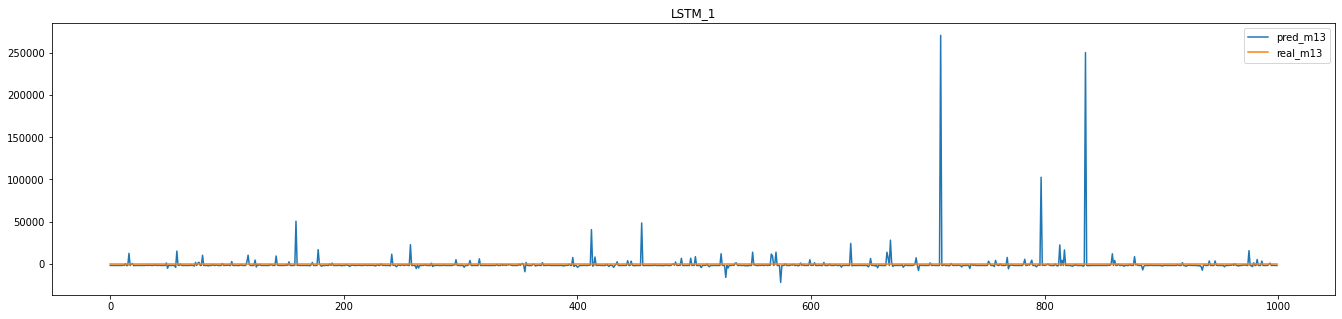

In [45]:
index = val_result_lstm.sort_values('real_m13').index
plt.figure(figsize = (23, 5))
# plt.plot(np.arange(0, val_result.shape[0]), val_result['real'][index].values, label = 'real')
plt.plot(np.arange(0, 1000), val_result_lstm['pred_m13'][index].values[:1000], label = 'pred_m13')
plt.plot(np.arange(0, 1000), val_result_lstm['real_m13'][index].values[:1000], label = 'real_m13')
# plt.plot(np.arange(0, 1000), val_result_lstm['real_m12'][index].values[:1000], label = 'real_m12')
plt.title('LSTM_1')
plt.legend()
plt.show()

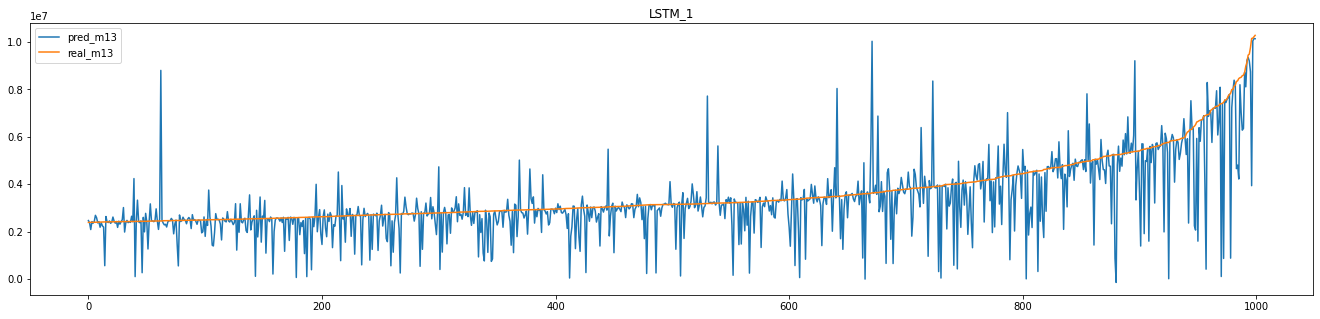

In [25]:
index = val_result_lstm.sort_values('real_m13').index
plt.figure(figsize = (23, 5))
# plt.plot(np.arange(0, val_result.shape[0]), val_result['real'][index].values, label = 'real')
plt.plot(np.arange(0, 1000), val_result_lstm['pred_m13'][index].values[-1000:], label = 'pred_m13')
plt.plot(np.arange(0, 1000), val_result_lstm['real_m13'][index].values[-1000:], label = 'real_m13')
plt.title('LSTM_1')
plt.legend()
plt.show()

* 觀察AUM_M12, AUM_M13的關係
* 手動刪除前一個月是0個row
* 改模型

## model2

In [26]:
# Define the LSTM model
model_2 = Sequential()
model_2.add(LSTM(32, input_shape = (12, 15), return_sequences = True))
model_2.add(Dropout(0.2))

model_2.add(LSTM(32, return_sequences = False))

model_2.add(Dense(1))

model_2.compile(loss = 'mean_absolute_error', optimizer = 'adam')
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 32)            6144      
_________________________________________________________________
dropout (Dropout)            (None, 12, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 14,497
Trainable params: 14,497
Non-trainable params: 0
_________________________________________________________________


In [27]:
start = time.time()
model_2_history = model_2.fit(train_x_lstm, train_y_lstm, batch_size = 32, epochs = 10)
end = time.time()
print("耗時: {} 秒".format(end-start))

Epoch 1/10
4377/4377 [==============================] - 21s 4ms/step - loss: 0.0093
Epoch 2/10
4377/4377 [==============================] - 19s 4ms/step - loss: 0.0060
Epoch 3/10
4377/4377 [==============================] - 19s 4ms/step - loss: 0.0058
Epoch 4/10
4377/4377 [==============================] - 18s 4ms/step - loss: 0.0057
Epoch 5/10
4377/4377 [==============================] - 19s 4ms/step - loss: 0.0057
Epoch 6/10
4377/4377 [==============================] - 18s 4ms/step - loss: 0.0056
Epoch 7/10
4377/4377 [==============================] - 19s 4ms/step - loss: 0.0055
Epoch 8/10
4377/4377 [==============================] - 18s 4ms/step - loss: 0.0056
Epoch 9/10
4377/4377 [==============================] - 19s 4ms/step - loss: 0.0055
Epoch 10/10
4377/4377 [==============================] - 18s 4ms/step - loss: 0.0055
耗時: 188.63559293746948 秒


In [28]:
pred_val_y_lstm2 = model_2.predict(val_x_lstm)

pred_inverse_val_y_lstm2 = inverse_transform(pred_val_y_lstm2)
real_inverse_val_y = inverse_transform(val_y.values)

val_result_lstm2 = build_result(pred_inverse_val_y_lstm2, real_inverse_val_y)

In [29]:
result_score = pd.DataFrame(columns = ['mse', 'rmse', 'mae', 'mean_adj_res'])
result_score = result_score.append(print_score(1, val_result_lstm))
result_score = result_score.append(print_score(2, val_result_lstm2))
result_score

,mse,rmse,mae,mean_adj_res
model1,4.415754e+10,210136.96,51893.56,0.02
model2,4.346160e+10,208474.45,57254.91,0.03


In [ ]:
val_result_lstm2.sort_values('abs(adj.residual(%))', ascending=False)[:20]

,real_m12,real_m13,pred_m13,residual(%),abs(residual(%)),adj.residual(%),abs(adj.residual(%))
59105,108125.76,7392850.01,1.108405e+05,-98.50,98.50,-3.34,3.34
26395,853413.68,7833641.01,8.682706e+05,-88.92,88.92,-3.20,3.20
54513,3896380.31,10143537.01,3.503050e+06,-65.47,65.47,-3.05,3.05
30189,867676.21,7452108.01,8.635760e+05,-88.41,88.41,-3.03,3.03
22340,419839.78,6905775.01,4.155657e+05,-93.98,93.98,-2.98,2.98
44176,19493.86,5760478.01,2.523643e+04,-99.56,99.56,-2.63,2.63
39304,10096667.57,3636166.01,9.371482e+06,157.73,157.73,2.63,2.63
13760,9591627.17,2452399.01,8.012926e+06,226.74,226.74,2.55,2.55
32915,4637900.30,8455875.01,3.136399e+06,-62.91,62.91,-2.44,2.44
7776,1592894.89,6643524.01,1.570314e+06,-76.36,76.36,-2.33,2.33


In [ ]:
val_result_lstm2.sort_values('abs(adj.residual(%))')[:20]

,real_m12,real_m13,pred_m13,residual(%),abs(residual(%)),adj.residual(%),abs(adj.residual(%))
30013,213406.61,224143.01,2.143934e+05,-4.35,4.35,-0.0,0.0
34155,24703.22,24730.01,3.175806e+04,28.42,28.42,0.0,0.0
34159,919.00,920.01,8.971530e+03,875.16,875.16,0.0,0.0
34164,157158.60,157450.01,1.682192e+05,6.84,6.84,0.0,0.0
34165,17380.16,15411.01,2.483047e+04,61.12,61.12,0.0,0.0
34166,376749.51,377158.01,3.739117e+05,-0.86,0.86,-0.0,0.0
34168,3176.56,7122.01,1.144767e+04,60.74,60.74,0.0,0.0
34169,166016.99,158900.01,1.684032e+05,5.98,5.98,0.0,0.0
34152,17087.47,14069.01,2.463890e+04,75.13,75.13,0.0,0.0
34170,583.37,422.01,8.929610e+03,2015.97,2015.97,0.0,0.0


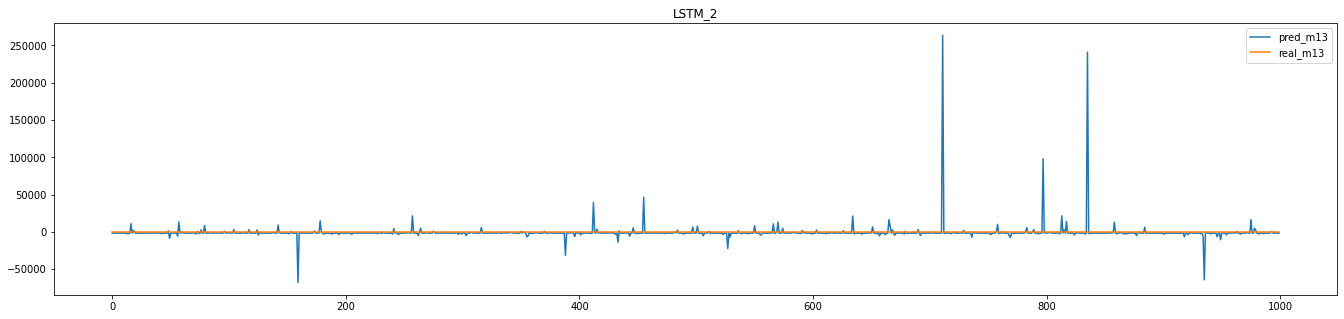

In [30]:
index = val_result_lstm2.sort_values('real_m13').index
plt.figure(figsize = (23, 5))
# plt.plot(np.arange(0, val_result.shape[0]), val_result['real'][index].values, label = 'real')
plt.plot(np.arange(0, 1000), val_result_lstm2['pred_m13'][index].values[:1000], label = 'pred_m13')
plt.plot(np.arange(0, 1000), val_result_lstm2['real_m13'][index].values[:1000], label = 'real_m13')

plt.title('LSTM_2')
plt.legend()
plt.show()

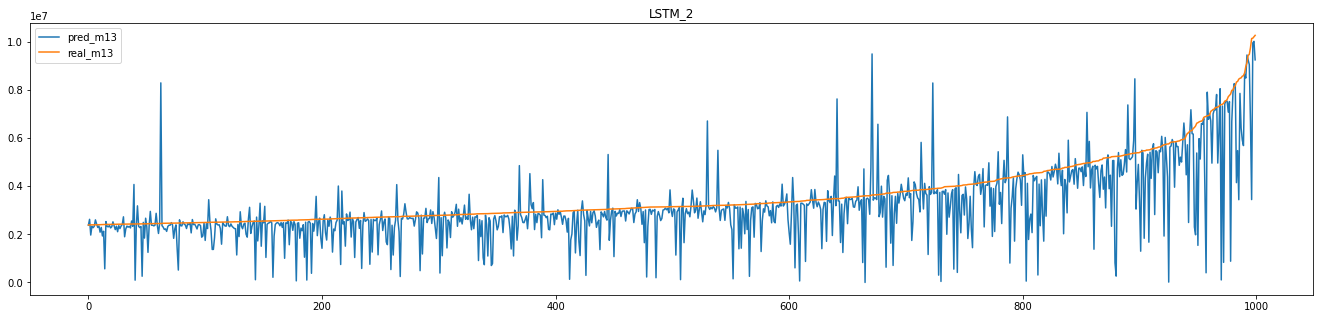

In [31]:
index = val_result_lstm2.sort_values('real_m13').index
plt.figure(figsize = (23, 5))
# plt.plot(np.arange(0, val_result.shape[0]), val_result['real'][index].values, label = 'real')
plt.plot(np.arange(0, 1000), val_result_lstm2['pred_m13'][index].values[-1000:], label = 'pred_m13')
plt.plot(np.arange(0, 1000), val_result_lstm2['real_m13'][index].values[-1000:], label = 'real_m13')
plt.title('LSTM_2')
plt.legend()
plt.show()

## model3

In [32]:
# Define the LSTM model
model_3 = Sequential()
model_3.add(LSTM(32, input_shape = (12, 15), return_sequences = True))
model_3.add(Dropout(0.2))

model_3.add(LSTM(64, return_sequences = True))
model_3.add(Dropout(0.2))

model_3.add(LSTM(64, return_sequences = False))

model_3.add(Dense(1))

model_3.compile(loss = 'mean_absolute_error', optimizer = 'adam')
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 12, 32)            6144      
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 32)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 12, 64)            24832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 64)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 64,065
Trainable params: 64,065
Non-trainable params: 0
__________________________________________________

In [33]:
start = time.time()
model_3_history = model_3.fit(train_x_lstm, train_y_lstm, batch_size = 32, epochs = 15)
end = time.time()
print("耗時: {} 秒".format(end-start))

Epoch 1/15
4377/4377 [==============================] - 28s 6ms/step - loss: 0.0100
Epoch 2/15
4377/4377 [==============================] - 25s 6ms/step - loss: 0.0063
Epoch 3/15
4377/4377 [==============================] - 25s 6ms/step - loss: 0.0061
Epoch 4/15
4377/4377 [==============================] - 25s 6ms/step - loss: 0.0060
Epoch 5/15
4377/4377 [==============================] - 25s 6ms/step - loss: 0.0058
Epoch 6/15
4377/4377 [==============================] - 26s 6ms/step - loss: 0.0058
Epoch 7/15
4377/4377 [==============================] - 25s 6ms/step - loss: 0.0058
Epoch 8/15
4377/4377 [==============================] - 25s 6ms/step - loss: 0.0057
Epoch 9/15
4377/4377 [==============================] - 25s 6ms/step - loss: 0.0057
Epoch 10/15
4377/4377 [==============================] - 25s 6ms/step - loss: 0.0057
Epoch 11/15
4377/4377 [==============================] - 25s 6ms/step - loss: 0.0056
Epoch 12/15
4377/4377 [==============================] - 26s 6ms/step - lo

In [34]:
pred_val_y_lstm3 = model_3.predict(val_x_lstm)

pred_inverse_val_y_lstm3 = inverse_transform(pred_val_y_lstm3)
real_inverse_val_y = inverse_transform(val_y.values)

val_result_lstm3 = build_result(pred_inverse_val_y_lstm3, real_inverse_val_y)

In [35]:
result_score = result_score.append(print_score(3, val_result_lstm3))
result_score

,mse,rmse,mae,mean_adj_res
model1,4.415754e+10,210136.96,51893.56,0.02
model2,4.346160e+10,208474.45,57254.91,0.03
model3,4.300782e+10,207383.27,54246.88,0.02


In [ ]:
val_result_lstm3.sort_values('abs(adj.residual(%))', ascending=False)[:20]

,real_m12,real_m13,pred_m13,residual(%),abs(residual(%)),adj.residual(%),abs(adj.residual(%))
59105,108125.76,7392850.01,1.186286e+05,-98.40,98.40,-3.34,3.34
54513,3896380.31,10143537.01,3.027200e+06,-70.16,70.16,-3.27,3.27
26395,853413.68,7833641.01,8.696158e+05,-88.90,88.90,-3.20,3.20
30189,867676.21,7452108.01,8.396834e+05,-88.73,88.73,-3.04,3.04
22340,419839.78,6905775.01,4.118950e+05,-94.04,94.04,-2.98,2.98
44176,19493.86,5760478.01,2.246012e+04,-99.61,99.61,-2.64,2.64
7776,1592894.89,6643524.01,1.561053e+06,-76.50,76.50,-2.33,2.33
32915,4637900.30,8455875.01,3.626995e+06,-57.11,57.11,-2.22,2.22
32143,2076783.22,6510032.01,1.793435e+06,-72.45,72.45,-2.17,2.17
10756,170290.36,5241997.01,5.715434e+05,-89.10,89.10,-2.14,2.14


In [ ]:
val_result_lstm3.sort_values('abs(adj.residual(%))')[:20]

,real_m12,real_m13,pred_m13,residual(%),abs(residual(%)),adj.residual(%),abs(adj.residual(%))
60027,255879.56,255372.01,251708.593750,-1.43,1.43,-0.0,0.0
23951,0.00,0.01,5311.049805,53110398.05,53110398.05,0.0,0.0
45397,10894.19,7933.01,16129.580078,103.32,103.32,0.0,0.0
23949,538.42,538.01,5827.979980,983.25,983.25,0.0,0.0
45399,636844.49,610211.01,618768.562500,1.40,1.40,0.0,0.0
23945,295.68,297.01,5598.319824,1784.89,1784.89,0.0,0.0
23944,169.82,170.01,5479.680176,3123.15,3123.15,0.0,0.0
23943,5070.50,20489.01,15984.740234,-21.98,21.98,-0.0,0.0
23942,146.84,77.01,5580.439941,7146.38,7146.38,0.0,0.0
23940,272.70,273.01,5577.200195,1942.86,1942.86,0.0,0.0


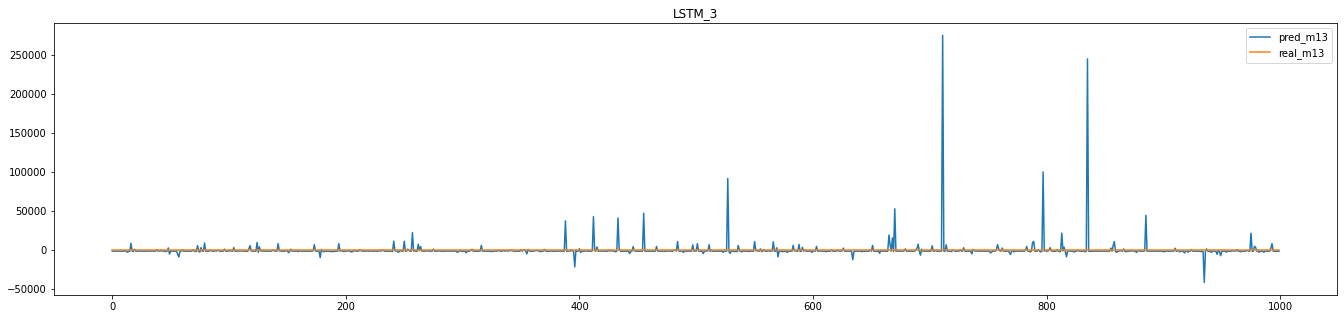

In [36]:
index = val_result_lstm3.sort_values('real_m13').index
plt.figure(figsize = (23, 5))
# plt.plot(np.arange(0, val_result.shape[0]), val_result['real'][index].values, label = 'real')
plt.plot(np.arange(0, 1000), val_result_lstm3['pred_m13'][index].values[:1000], label = 'pred_m13')
plt.plot(np.arange(0, 1000), val_result_lstm3['real_m13'][index].values[:1000], label = 'real_m13')
plt.title('LSTM_3')
plt.legend()
plt.show()

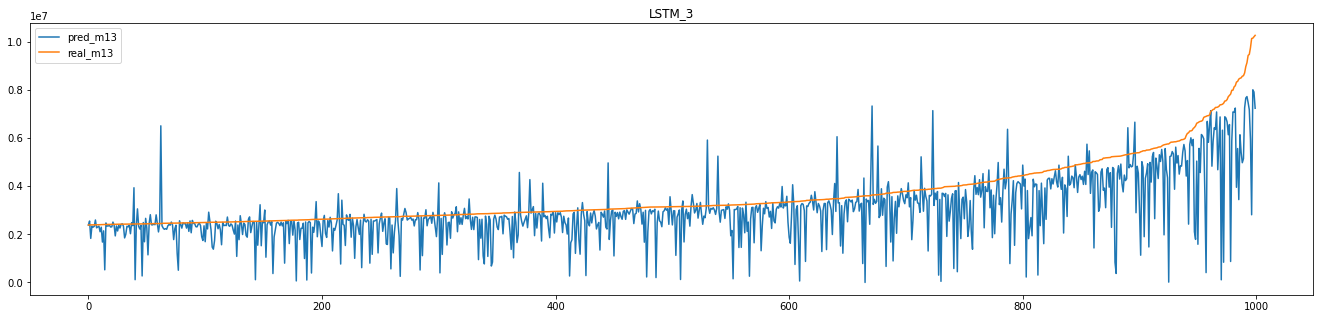

In [37]:
index = val_result_lstm3.sort_values('real_m13').index
plt.figure(figsize = (23, 5))
# plt.plot(np.arange(0, val_result.shape[0]), val_result['real'][index].values, label = 'real')
plt.plot(np.arange(0, 1000), val_result_lstm3['pred_m13'][index].values[-1000:], label = 'pred_m13')
plt.plot(np.arange(0, 1000), val_result_lstm3['real_m13'][index].values[-1000:], label = 'real_m13')
plt.title('LSTM_3')
plt.legend()
plt.show()

In [ ]:
bad_1000_1 = val_result_lstm.sort_values('abs(adj.residual(%))', ascending=False)[:1000].index
bad_1000_2 = val_result_lstm2.sort_values('abs(adj.residual(%))', ascending=False)[:1000].index
bad_1000_3 = val_result_lstm3.sort_values('abs(adj.residual(%))', ascending=False)[:1000].index

In [ ]:
and12 = 0
for i in bad_1000_1:
  if i in bad_1000_2:
    and12 += 1
and12

936

In [ ]:
and23 = 0
for i in bad_1000_2:
  if i in bad_1000_3:
    and23 += 1
and23

901

In [ ]:
and13 = 0
for i in bad_1000_1:
  if i in bad_1000_3:
    and13 += 1
and13

889